In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
data = pd.read_csv("data/dataset_sdn.csv")
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [3]:
data.shape

(104345, 23)

In [4]:
data.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [5]:
features = [
    "pktcount", "bytecount", "pktperflow", "pktrate", "tx_kbps", "rx_kbps"
]
target = "label"
data[features].head()

,pktcount,bytecount,pktperflow,pktrate,tx_kbps,rx_kbps
0,45304,48294064,13535,451,0,0.0
1,126395,134737070,13531,451,0,0.0
2,90333,96294978,13534,451,0,0.0
3,90333,96294978,13534,451,0,0.0
4,90333,96294978,13534,451,0,0.0


In [6]:
data[features].describe()

,pktcount,bytecount,pktperflow,pktrate,tx_kbps,rx_kbps
count,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,103839.000000
mean,52860.954746,3.818660e+07,6381.715291,212.210676,998.899756,1003.811420
std,52023.241460,4.877748e+07,7404.777808,246.855123,2423.471618,2054.887034
min,0.000000,0.000000e+00,-130933.000000,-4365.000000,0.000000,0.000000
25%,808.000000,7.957600e+04,29.000000,0.000000,0.000000,0.000000
50%,42828.000000,6.471930e+06,8305.000000,276.000000,0.000000,0.000000
75%,94796.000000,7.620354e+07,10017.000000,333.000000,251.000000,557.000000
max,260006.000000,1.471280e+08,19190.000000,639.000000,20580.000000,16577.000000


In [7]:
data[features].isna().sum()

pktcount        0
bytecount       0
pktperflow      0
pktrate         0
tx_kbps         0
rx_kbps       506
dtype: int64

Only the `rx_kbps` column has empty values

In [8]:
data['rx_kbps'].value_counts(normalize = True) * 100

rx_kbps
0.0       51.843720
1.0        5.256214
2.0        2.876569
3.0        2.005027
3838.0     1.312609
            ...    
2336.0     0.000963
1122.0     0.000963
6419.0     0.000963
2424.0     0.000963
2100.0     0.000963
Name: proportion, Length: 1730, dtype: float64

In [9]:
data['rx_kbps'].fillna(0.0, inplace=True)
data['rx_kbps'].describe()

/var/folders/fn/skbvh3qd0qn_2lr8c4bwwsk00000gn/T/ipykernel_3099/4179401224.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rx_kbps'].fillna(0.0, inplace=True)


count    104345.000000
mean        998.943639
std        2051.084288
min           0.000000
25%           0.000000
50%           0.000000
75%         529.000000
max       16577.000000
Name: rx_kbps, dtype: float64

## Label

In [10]:
data[target].describe()

count    104345.000000
mean          0.390857
std           0.487945
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64

In [11]:
data[target] = pd.Categorical(data[target])
data[target].describe()

count     104345
unique         2
top            0
freq       63561
Name: label, dtype: int64

In [12]:
data[target].value_counts(normalize = True) * 100

label
0    60.914275
1    39.085725
Name: proportion, dtype: float64

<Axes: ylabel='label'>

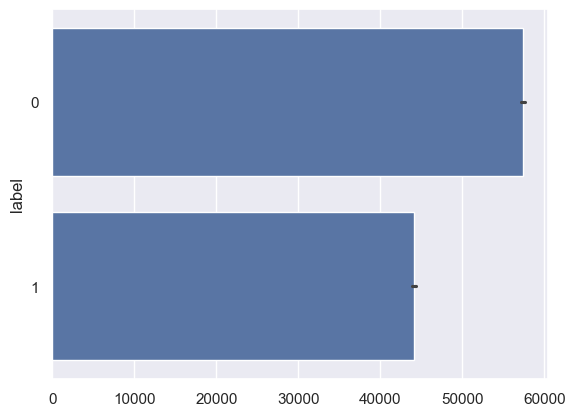

In [13]:
sns.barplot(data[target])

According to the response `Label` distribution, we can say that the data is not **imbalanced**.

<Axes: >

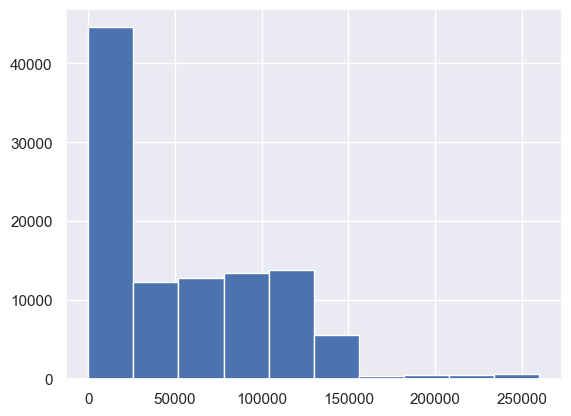

In [14]:
data['pktcount'].hist()

In [15]:
features

['pktcount', 'bytecount', 'pktperflow', 'pktrate', 'tx_kbps', 'rx_kbps']

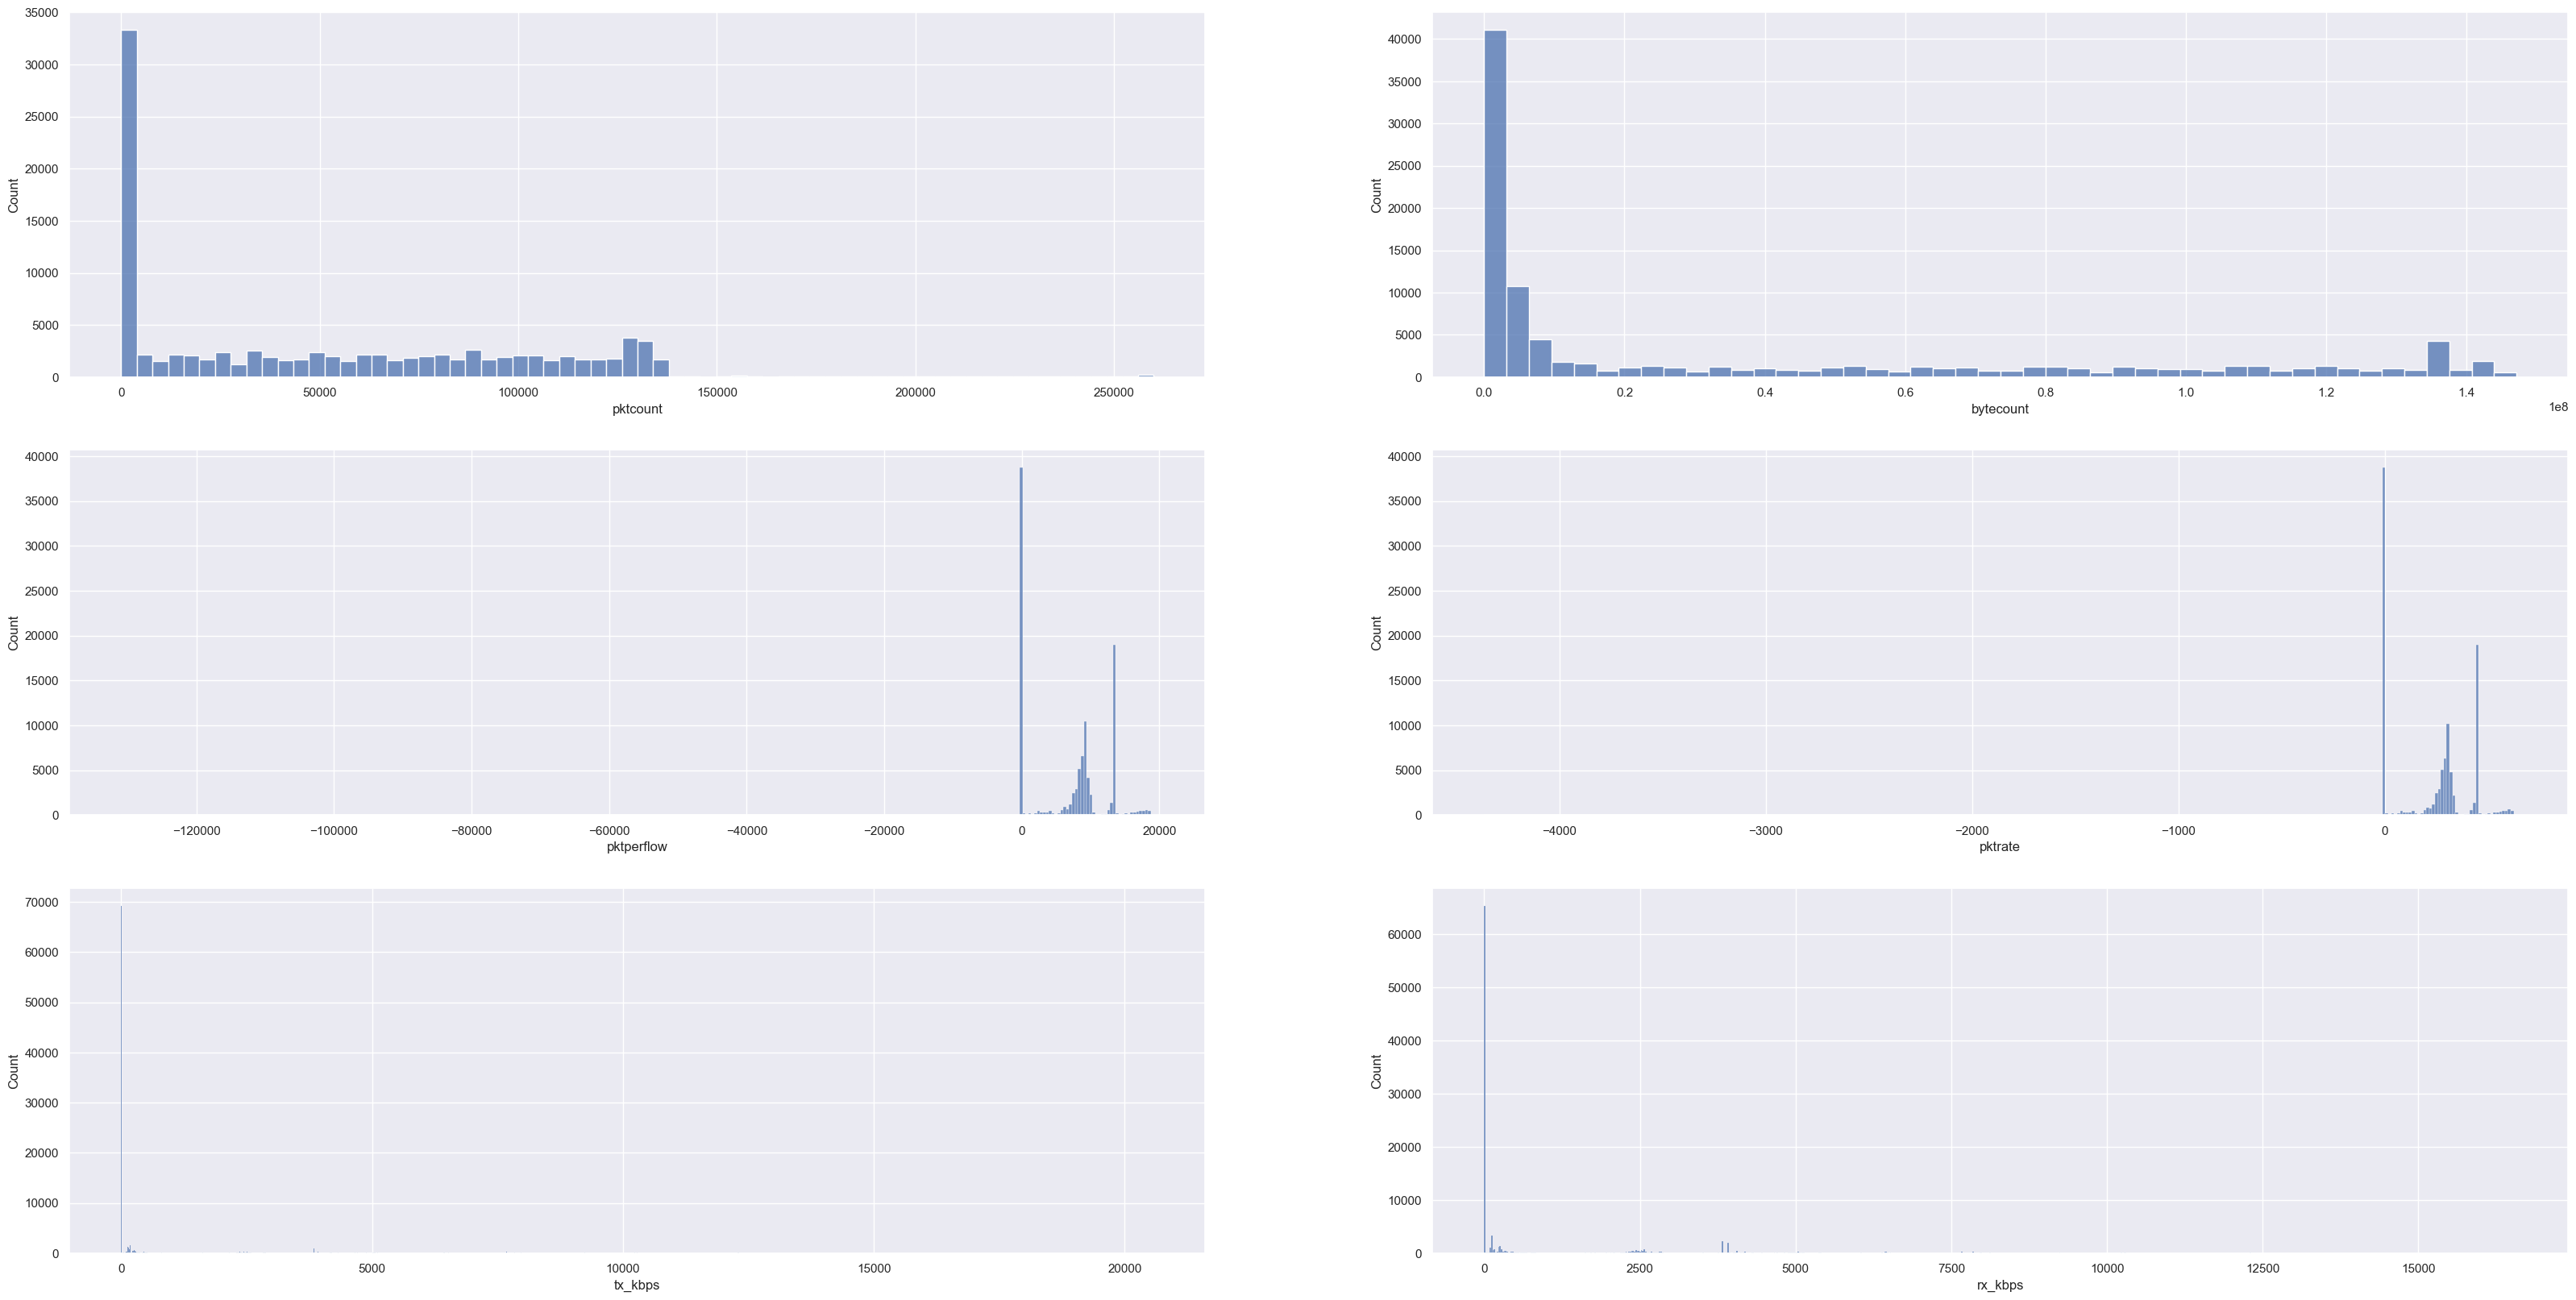

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(40, 20))
                         
for ax, i in zip( axes.ravel(), data[features]):
    sns.histplot(data[i], ax=ax)

plt.show()

All the features are skewed.

- pktcount, bytecount, tx_kbps, tx_kbps : right skewed
- pktperflow, pktrate: left skewed

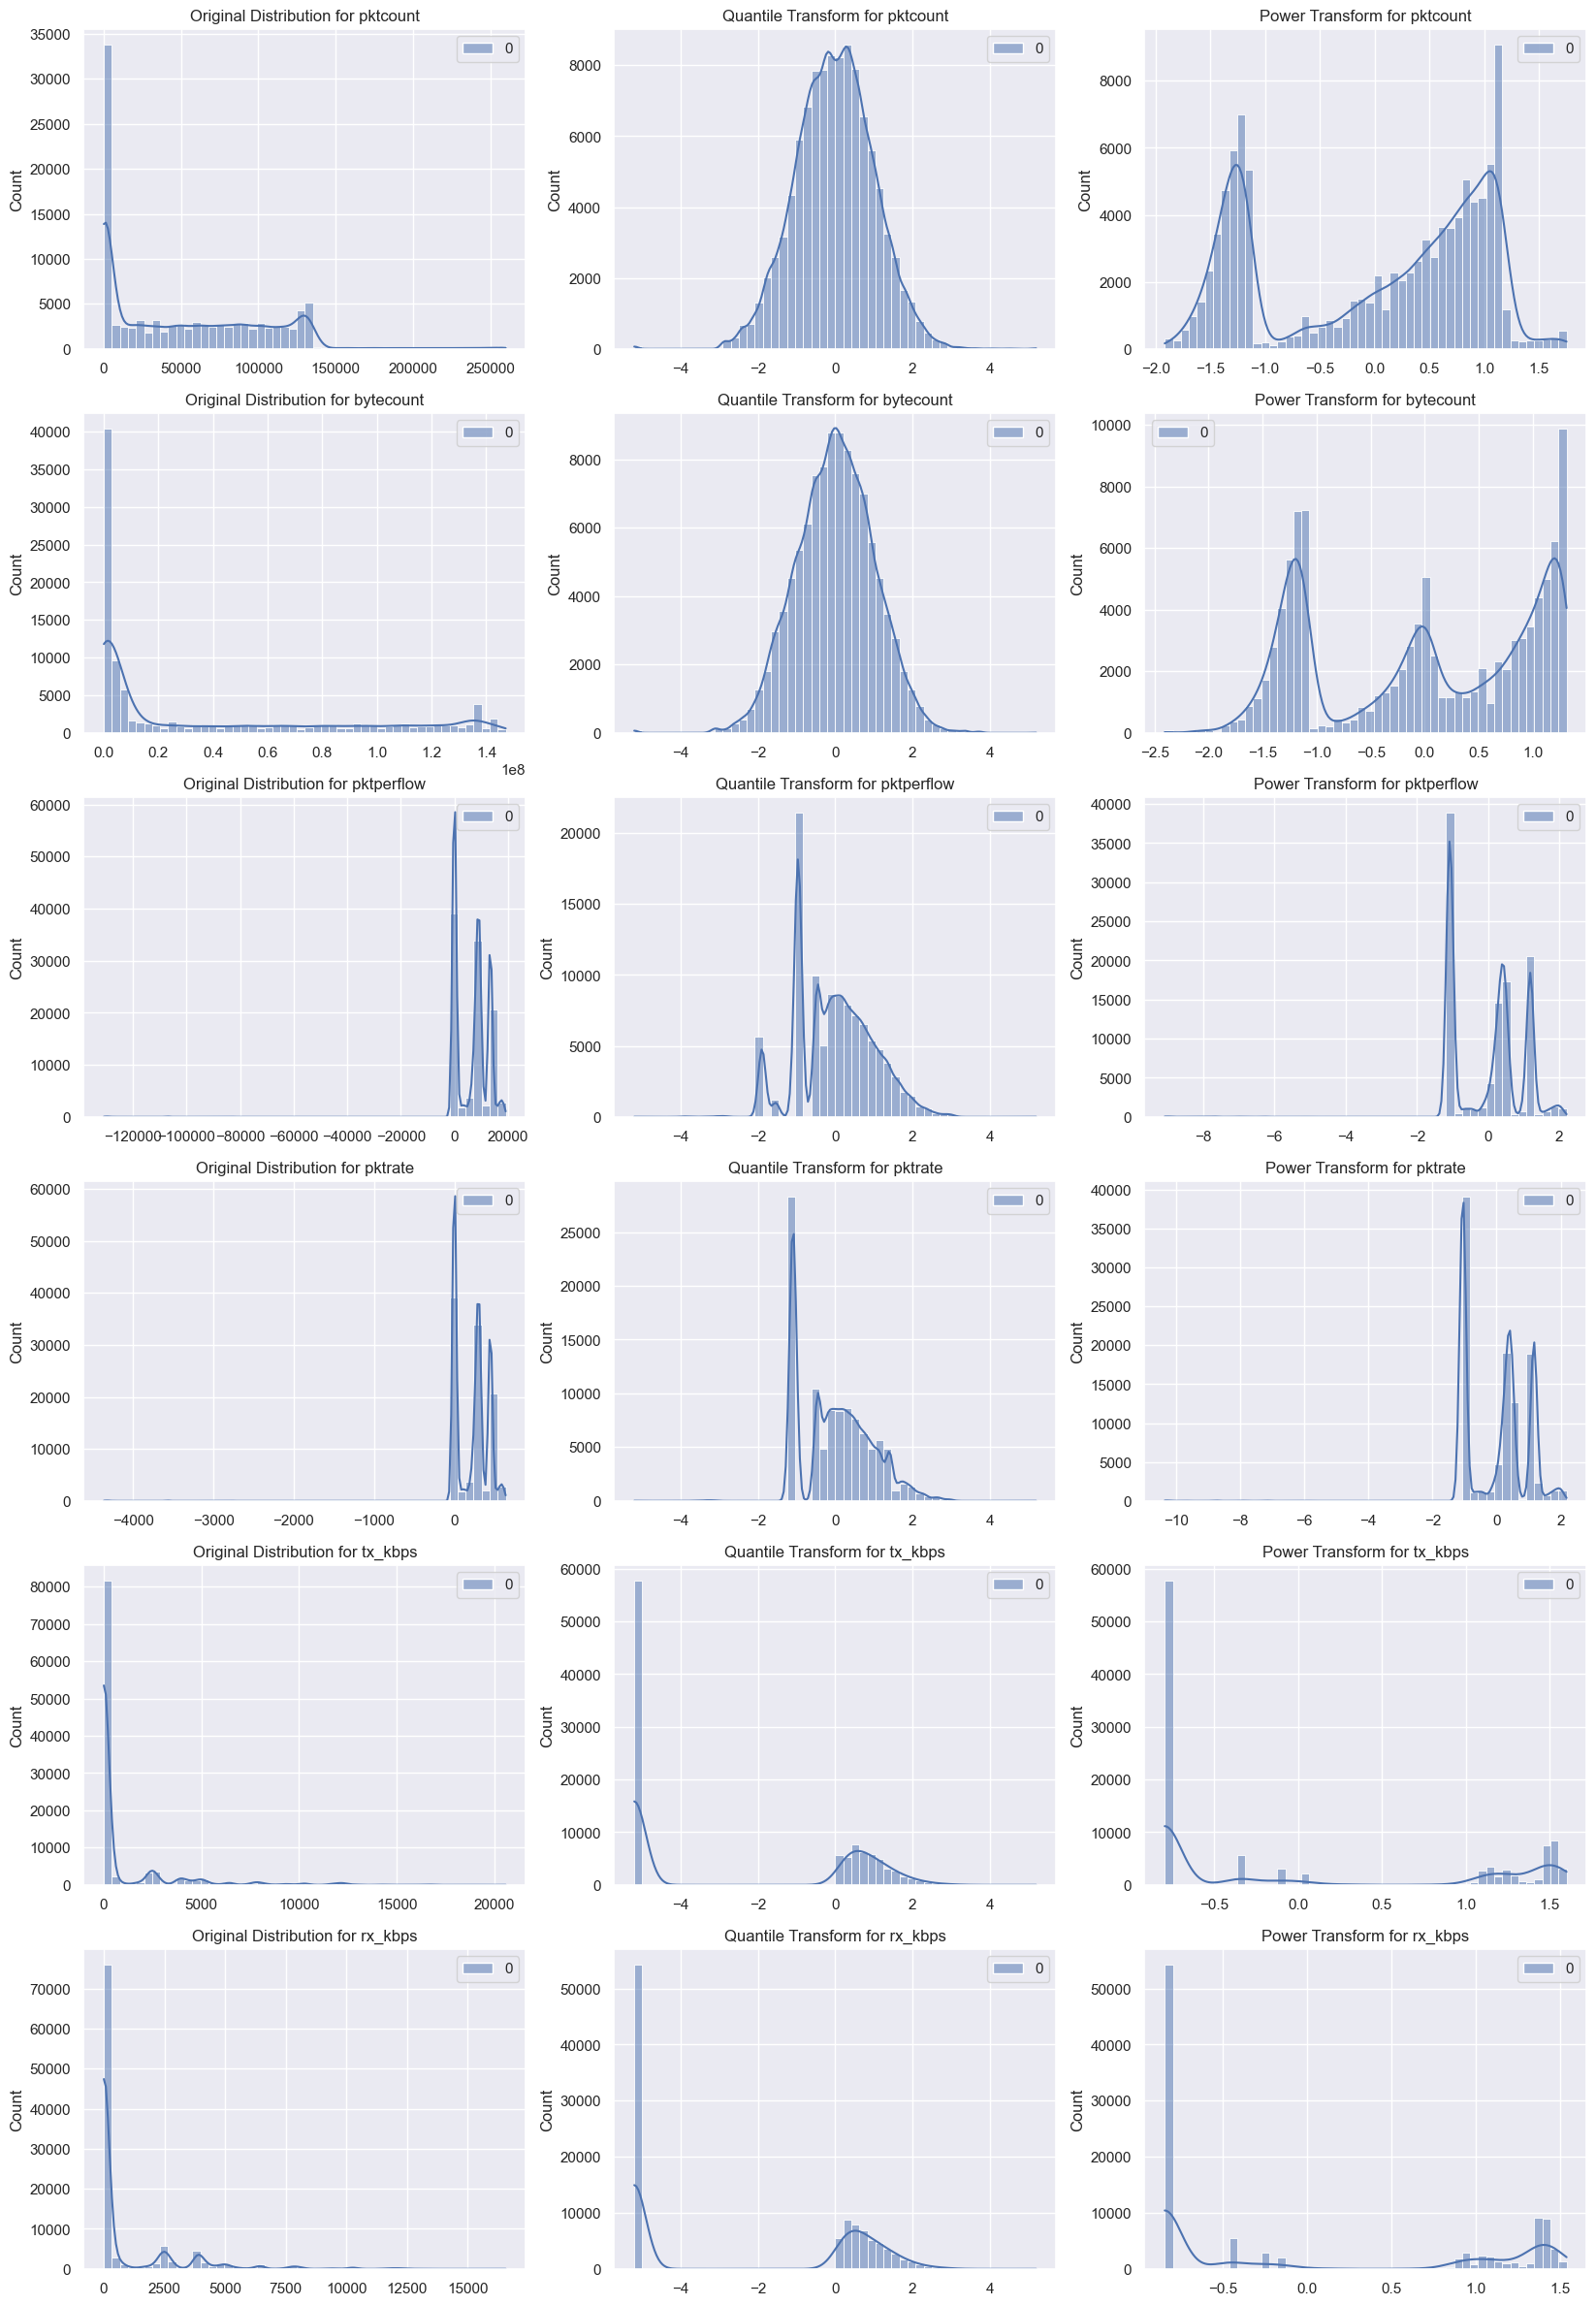

In [17]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

pt = PowerTransformer()
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')

fig = plt.figure(figsize=(20,30))
j = 1

for i in features:
    array = np.array(data[i]).reshape(-1, 1)

    y = pt.fit_transform(array)
    x = qt.fit_transform(array)

    plt.subplot(len(features), 3, j)
    sns.histplot(array, bins = 50, kde = True)
    plt.title(f"Original Distribution for {i}")
    
    plt.subplot(len(features), 3, j+1)
    sns.histplot(x, bins = 50, kde = True)
    plt.title(f"Quantile Transform for {i}")
    
    plt.subplot(len(features), 3, j+2)
    sns.histplot(y, bins = 50, kde = True)
    plt.title(f"Power Transform for {i}")
    
    j += 3

We notice that the **Quantitle transformation** is performing better than the Power transformation.

We are going to update all the features columns with new data.

In [18]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')

data_transformed = data[features].copy()
for column in features:
    array = np.array(data[column]).reshape(-1, 1)
    transformed = qt.fit_transform(array)

    data_transformed[column] = np.squeeze(transformed)

# data_transformed.hist()

In [19]:
data_transformed[target] = data[target]
data_transformed.head()

,pktcount,bytecount,pktperflow,pktrate,tx_kbps,rx_kbps,label
0,0.020689,0.432727,1.403994,1.364708,-5.199338,-5.199338,0
1,1.261191,1.475445,1.269090,1.364708,-5.199338,-5.199338,0
2,0.624414,0.883585,1.377568,1.364708,-5.199338,-5.199338,0
3,0.624414,0.883585,1.377568,1.364708,-5.199338,-5.199338,0
4,0.624414,0.883585,1.377568,1.364708,-5.199338,-5.199338,0


## Split data to train and test

In [20]:
data_transformed["kfold"] = -1
data_transformed = data_transformed.sample(frac=1).reset_index(drop=True)

In [21]:
label = data_transformed.label.values
label

[0, 0, 1, 0, 0, ..., 1, 1, 1, 0, 1]
Length: 104345
Categories (2, int64): [0, 1]

In [22]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, random_state=2024, shuffle=True)
for f, (t_, v_) in enumerate(kf.split(X=data_transformed, y=label)):
    data_transformed.loc[v_, 'kfold'] = f

data_transformed.head()

,pktcount,bytecount,pktperflow,pktrate,tx_kbps,rx_kbps,label,kfold
0,0.798042,1.019066,1.043767,1.013919,-5.199338,1.204343,0,3
1,-0.594055,-0.610421,-0.972783,-1.101817,0.194619,0.136048,0,4
2,0.391125,0.685722,0.314018,0.300852,-5.199338,-5.199338,1,1
3,1.341792,0.049693,-0.293309,-0.284402,0.425389,0.341544,0,4
4,-1.154008,-1.173785,-0.482771,-0.468708,-5.199338,-5.199338,0,1


/Users/maelfosso/.pyenv/versions/3.10.14/envs/ai/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


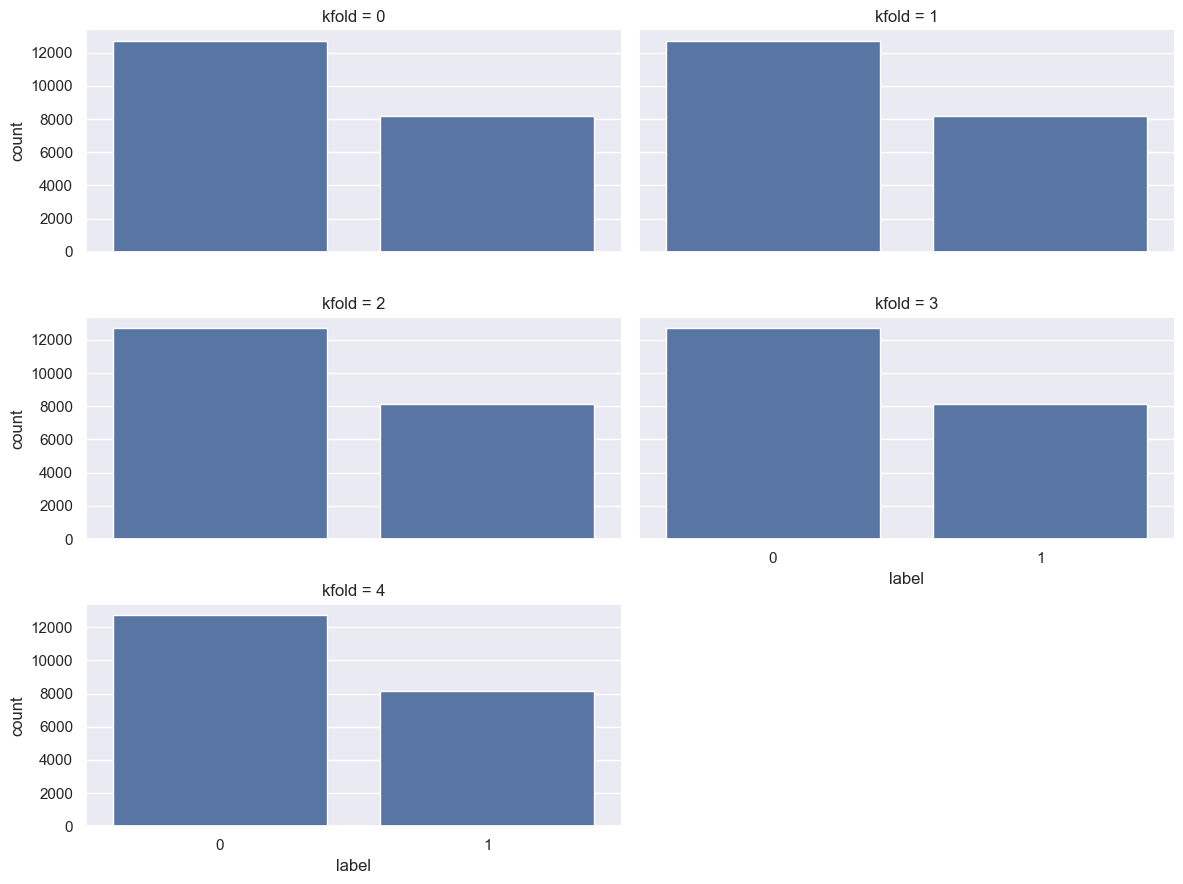

In [23]:
g = sns.FacetGrid(data_transformed, col="kfold", col_wrap=2, aspect=2)
g.map(sns.countplot, 'label')

From the grid, we can notice that they have the distribution of `label` is almost the same in each fold

# Modeling

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [25]:
data = data_transformed.copy()

X_train, X_test, y_train, y_test = train_test_split(
    data[features], data[target], test_size=0.2, stratify=data[target],
    shuffle=True, random_state=2024
)

cv_kfold = StratifiedKFold(n_splits=10, random_state=2024, shuffle=True)

logs = pd.DataFrame(columns=["model", "params", "training_score", "test_score"])

## KNN

### Define the model

In [26]:
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
knn_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

### Select the best value for K

In [27]:
parameters = {"knn__n_neighbors": range(1, 200, 2)}
grid_search = GridSearchCV(knn_pipe, param_grid=parameters,
                           cv=cv_kfold, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

logs.loc[len(logs)] = {
    "model": "knn",
    "params": grid_search.best_params_,
    "training_score": grid_search.best_score_,
    "test_score": grid_search.score(X_test, y_test)
}

print(grid_search.best_params_, grid_search.best_score_)
print(grid_search.score(X_test, y_test))

/Users/maelfosso/.pyenv/versions/3.10.14/envs/ai/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'knn__n_neighbors': 1} 0.98606783629041
0.987397575350999


In [28]:
logs

,model,params,training_score,test_score
0,knn,{'knn__n_neighbors': 1},0.986068,0.987398


## Logistic regression

In [29]:
lreg = LogisticRegression(random_state=2024)

In [30]:
parameters = {
    "penalty": ["l1", "l2", "elasticnet", None],
    'C': np.logspace(-3, 3, 7)
}
grid_search = GridSearchCV(lreg, param_grid=parameters,
                           cv=cv_kfold, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

logs.loc[len(logs)] = {
    "model": "lreg",
    "params": grid_search.best_params_,
    "training_score": grid_search.best_score_,
    "test_score": grid_search.score(X_test, y_test)
}

print(grid_search.best_params_, grid_search.best_score_)
print(grid_search.score(X_test, y_test))

/Users/maelfosso/.pyenv/versions/3.10.14/envs/ai/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/maelfosso/.pyenv/versions/3.10.14/envs/ai/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/maelfosso/.pyenv/versions/3.10.14/envs/ai/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/maelfosso/.pyenv/versions/3.10.14/envs/ai/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/maelfosso/.pyenv/versions/3.10.14/envs/ai/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will

{'C': 0.001, 'penalty': 'l2'} 0.7574871303061063
0.7547079400067085


In [31]:
logs

,model,params,training_score,test_score
0,knn,{'knn__n_neighbors': 1},0.986068,0.987398
1,lreg,"{'C': 0.001, 'penalty': 'l2'}",0.757487,0.754708


## Linear Discriminant Analysis

In [32]:
lda = LinearDiscriminantAnalysis()

In [33]:
parameters = {
    "solver": ["svd", "lsqr", "eigen"]
}
grid_search = GridSearchCV(lda, param_grid=parameters,
                           cv=cv_kfold, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

logs.loc[len(logs)] = {
    "model": "lda",
    "params": grid_search.best_params_,
    "training_score": grid_search.best_score_,
    "test_score": grid_search.score(X_test, y_test)
}

print(grid_search.best_params_, grid_search.best_score_)
print(grid_search.score(X_test, y_test))

{'solver': 'svd'} 0.752575569071036
0.7485744405577651


In [34]:
logs

,model,params,training_score,test_score
0,knn,{'knn__n_neighbors': 1},0.986068,0.987398
1,lreg,"{'C': 0.001, 'penalty': 'l2'}",0.757487,0.754708
2,lda,{'solver': 'svd'},0.752576,0.748574


## Quadratic Discriminant Analysis

In [35]:
qda = QuadraticDiscriminantAnalysis()

In [36]:
parameters = {}
grid_search = GridSearchCV(qda, param_grid=parameters,
                           cv=cv_kfold, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

logs.loc[len(logs)] = {
    "model": "qda",
    "params": grid_search.best_params_,
    "training_score": grid_search.best_score_,
    "test_score": grid_search.score(X_test, y_test)
}

print(grid_search.best_params_, grid_search.best_score_)
print(grid_search.score(X_test, y_test))

{} 0.795881314777928
0.7939048349226124


In [37]:
logs

,model,params,training_score,test_score
0,knn,{'knn__n_neighbors': 1},0.986068,0.987398
1,lreg,"{'C': 0.001, 'penalty': 'l2'}",0.757487,0.754708
2,lda,{'solver': 'svd'},0.752576,0.748574
3,qda,{},0.795881,0.793905


## Naive Bayes

In [38]:
nb = GaussianNB()

In [39]:
parameters = {}
grid_search = GridSearchCV(nb, param_grid=parameters,
                           cv=cv_kfold, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

logs.loc[len(logs)] = {
    "model": "nb",
    "params": grid_search.best_params_,
    "training_score": grid_search.best_score_,
    "test_score": grid_search.score(X_test, y_test)
}

print(grid_search.best_params_, grid_search.best_score_)
print(grid_search.score(X_test, y_test))

{} 0.6829985197060722
0.6860414969572093


In [40]:
logs

,model,params,training_score,test_score
0,knn,{'knn__n_neighbors': 1},0.986068,0.987398
1,lreg,"{'C': 0.001, 'penalty': 'l2'}",0.757487,0.754708
2,lda,{'solver': 'svd'},0.752576,0.748574
3,qda,{},0.795881,0.793905
4,nb,{},0.682999,0.686041


## Decision Tree Classifier

In [41]:
tree = DecisionTreeClassifier()

In [42]:
parameters = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
}
grid_search = GridSearchCV(tree, param_grid=parameters,
                           cv=cv_kfold, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

logs.loc[len(logs)] = {
    "model": "tree",
    "params": grid_search.best_params_,
    "training_score": grid_search.best_score_,
    "test_score": grid_search.score(X_test, y_test)
}

print(grid_search.best_params_, grid_search.best_score_)
print(grid_search.score(X_test, y_test))

{'criterion': 'gini', 'splitter': 'best'} 0.9979634735880305
0.9975082658488668


In [43]:
logs

,model,params,training_score,test_score
0,knn,{'knn__n_neighbors': 1},0.986068,0.987398
1,lreg,"{'C': 0.001, 'penalty': 'l2'}",0.757487,0.754708
2,lda,{'solver': 'svd'},0.752576,0.748574
3,qda,{},0.795881,0.793905
4,nb,{},0.682999,0.686041
5,tree,"{'criterion': 'gini', 'splitter': 'best'}",0.997963,0.997508


## SVM

In [44]:
lsvc_pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('lsvc', LinearSVC(random_state=2024))
])

In [45]:
parameters = {
    'poly__degree': range(1, 6),
    'lsvc__C': np.logspace(-3, 3, 7),
}
grid_search = GridSearchCV(lsvc_pipe, param_grid=parameters,
                           cv=cv_kfold, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

logs.loc[len(logs)] = {
    "model": "lsvc",
    "params": grid_search.best_params_,
    "training_score": grid_search.best_score_,
    "test_score": grid_search.score(X_test, y_test)
}

print(grid_search.best_params_, grid_search.best_score_)
print(grid_search.score(X_test, y_test))

/Users/maelfosso/.pyenv/versions/3.10.14/envs/ai/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/maelfosso/.pyenv/versions/3.10.14/envs/ai/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maelfosso/.pyenv/versions/3.10.14/envs/ai/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maelfosso/.pyenv/versions/3.10.14/envs/ai/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/maelfosso/.pyenv/versions/3.10.14/envs/ai/lib/python3.10/site-packages/sklearn/svm/_ba

{'lsvc__C': 1000.0, 'poly__degree': 5} 0.9325195567625586
0.9293210024438162


In [ ]:
logs

In [ ]:
svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=2024))
])

In [ ]:
parameters = {
    'svc__C': np.logspace(-3, 3, 7),
    'svc__degree': range(1, 6),
    'svc__kernel': ["poly", "rbf"]
}
grid_search = GridSearchCV(svc_pipe, param_grid=parameters,
                           cv=cv_kfold, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

logs.loc[len(logs)] = {
    "model": "svc",
    "params": grid_search.best_params_,
    "training_score": grid_search.best_score_,
    "test_score": grid_search.score(X_test, y_test)
}

print(grid_search.best_params_, grid_search.best_score_)
print(grid_search.score(X_test, y_test))